# Introduction to Regression with Neural Networks

In [6]:
import tensorflow as tf

print(tf.__version__)

2.4.1


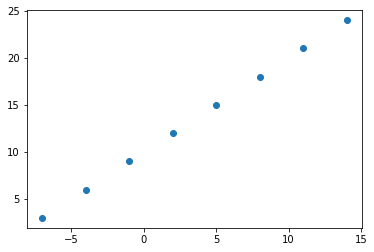

In [12]:
# Creating Data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create Labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize
plt.scatter(X, y)

## Input and Output shapes

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

In [13]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
# Convert Numpy Arrays to Tensors
X = tf.constant(X)
y = tf.constant(y)

## Steps in Modeling

In [22]:
# Set Random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the Model
model.compile(loss=tf.keras.losses.mae, # MEA = Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 458ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [21]:
# Do a prediction with our trained model.
y_pred = model.predict([17.])
y_pred

array([[30.158512]], dtype=float32)

## Improving the model

In [35]:
# Create Features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14., 17., 20., 23., 26., 29., 32.])

# Create Labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24., 27., 30., 33., 36., 39., 42.])

X = tf.constant(X)
y = tf.constant(y)

# 1. Create a model using the Sequential API.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the Model
model.compile(loss=tf.keras.losses.mae, # MEA = Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 605ms/step - loss: 21.9128 - mae: 21.9128
Epoch 2/200
1/1 [==============================] - 0s 36ms/step - loss: 21.8296 - mae: 21.8296
Epoch 3/200
1/1 [==============================] - 0s 45ms/step - loss: 21.7463 - mae: 21.7463
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 21.6630 - mae: 21.6630
Epoch 5/200
1/1 [==============================] - 0s 14ms/step - loss: 21.5796 - mae: 21.5796
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 21.4961 - mae: 21.4961
Epoch 7/200
1/1 [==============================] - 0s 15ms/step - loss: 21.4124 - mae: 21.4124
Epoch 8/200
1/1 [==============================] - 0s 17ms/step - loss: 21.3287 - mae: 21.3287
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 21.2448 - mae: 21.2448
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 21.1615 - mae: 21.1615
Epoch 11/200
1/1 [==============================] - 

In [37]:
model.predict([17.0])

array([[24.609522]], dtype=float32)